In [1]:
from CausalModule import CausalModule
# from run_effect_estimation import run_effect_estimation
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_url = "https://raw.githubusercontent.com/FenTechSolutions/CausalDiscoveryToolbox/master/cdt/data/resources/cyto_full_data.csv"
data = pd.read_csv(data_url) 
discovery_algorithm = "icalingam" 
treatment_variable = "PIP3"
outcome_variable = "pmek"
treatment_value = data["PIP3"].quantile(0.75)
control_value = data["PIP3"].min()

2025-08-06 11:27:06,144 INFO: CausalModule initialized with provided parameters.
2025-08-06 11:27:06,146 INFO: Finding causal graph using icalingam algorithm
2025-08-06 11:27:06,762 INFO: Refuting the discovered/given causal graph
Test permutations of given graph: 100%|██████████| 10/10 [00:25<00:00,  2.60s/it]
2025-08-06 11:27:40,434 INFO: Creating a causal model from the discovered/given causal graph
2025-08-06 11:27:40,435 INFO: Model to find the causal effect of treatment ['PIP3'] on outcome ['pmek']
2025-08-06 11:27:40,435 INFO: Identifying the effect estimand of the treatment on the outcome variable
2025-08-06 11:27:40,436 INFO: Causal effect can be identified.
2025-08-06 11:27:40,441 INFO: Instrumental variables for treatment and outcome:[]
2025-08-06 11:27:40,442 INFO: Frontdoor variables for treatment and outcome:[]
2025-08-06 11:27:40,443 INFO: Note that you can also use other methods for the identification process. Below are method descriptions taken directly from DoWhy's do

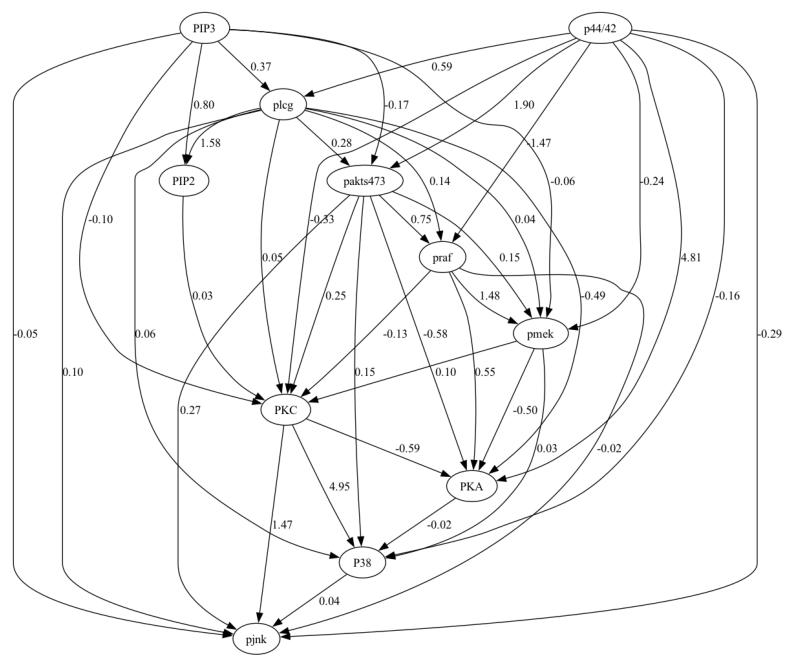

2025-08-06 11:27:55,111 INFO: ==========================================
2025-08-06 11:27:55,113 INFO: Number of nodes: 11
2025-08-06 11:27:55,113 INFO: ==========================================
2025-08-06 11:27:55,114 INFO: Number of edges: 41
2025-08-06 11:27:55,114 INFO: ==========================================
2025-08-06 11:27:55,114 INFO: Edge: praf -> pmek, Weight: 1
2025-08-06 11:27:55,115 INFO: Edge: praf -> PKA, Weight: 1
2025-08-06 11:27:55,115 INFO: Edge: praf -> PKC, Weight: 1
2025-08-06 11:27:55,115 INFO: Edge: praf -> pjnk, Weight: 1
2025-08-06 11:27:55,116 INFO: Edge: pmek -> PKA, Weight: 1
2025-08-06 11:27:55,116 INFO: Edge: pmek -> PKC, Weight: 1
2025-08-06 11:27:55,116 INFO: Edge: pmek -> P38, Weight: 1
2025-08-06 11:27:55,116 INFO: Edge: PKA -> P38, Weight: 1
2025-08-06 11:27:55,117 INFO: Edge: PKC -> PKA, Weight: 1
2025-08-06 11:27:55,117 INFO: Edge: PKC -> P38, Weight: 1
2025-08-06 11:27:55,117 INFO: Edge: PKC -> pjnk, Weight: 1
2025-08-06 11:27:55,117 INFO: Edg

In [3]:
# Initialize the CausalModule with the provided parameters
causal_module = CausalModule(
    data=data,
    discovery_algorithm=discovery_algorithm,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
    treatment_value=treatment_value,
    control_value=control_value
)

# Find the causal graph
causal_module.find_causal_graph()
# Refute the causal graph
causal_module.refute_cgm(n_perm=10)
# Create a causal graph model
causal_module.create_model()
# Identify the estimand
causal_module.identify_effect()
# Estimate the effect
causal_module.estimate_effect()
# Refute the estimate
causal_module.refute_estimate()
# Visualize the causal graph
causal_module.see_graph()
# Getting graph metrics
causal_module.see_graph_properties()
# Getting graph refutation metrics
causal_module.see_graph_refutation()
# Getting effect estimation metrics
causal_module.see_effect_estimation()
# Getting effect estimation refutation metrics
causal_module.see_estimate_refutation()
# Save results to CSV (default directory is 'outputs/results')
causal_module.store_results()

In [4]:
interventional_samples = causal_module.simulate_intervention(
    variable_to_intervene="PIP3",
    intervention_value=32.8,
    num_samples_to_draw=1000
)

Fitting causal mechanism of node p44/42: 100%|██████████| 11/11 [00:01<00:00,  6.06it/s] 


In [5]:
interventional_samples.head()

,PIP3,p44/42,plcg,PIP2,pakts473,praf,pmek,PKC,PKA,P38,pjnk
0,32.8,106.00,116.287203,238.441221,537.801798,789.442692,1203.975821,147.500258,-8.021708,789.429964,429.126279
1,32.8,5.33,-36.812674,-0.645280,44.741241,421.377650,585.077065,-24.023329,795.639182,-195.245522,66.366065
2,32.8,8.98,11.884066,139.794676,28.344431,30.517310,16.580888,68.735828,734.102029,213.511513,155.664300
3,32.8,6.49,15.841224,127.589062,43.645085,177.564767,236.598526,22.279749,696.836640,108.897610,73.892866
4,32.8,80.60,273.384443,500.580708,530.307197,410.005736,594.575694,113.050026,-4.630961,524.396372,484.615072
